## Sentiment Anylisis Model - Musical Instruments Review
### COMP262 - Group 3
### Team Members

- Devanshi Shah
- Hitesh Dharmadhikari
- Jefil Tasna John Mohan
- Nestor Romero
- Shrikant Kale

### 1. Dataset data exploration

In [26]:
import json
import pandas as pd
df = pd.read_json(r'Musical_Instruments_5.json',lines = True)

1. reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
2. asin - ID of the product, e.g. 0000013714
3. reviewerName - name of the reviewer
4. helpful - helpfulness rating of the review, e.g. 2/3
5. reviewText - text of the review
6. overall - rating of the product
7. summary - summary of the review
8. unixReviewTime - time of the review (unix time)
9. reviewTime - time of the review (raw)

In [25]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reviewerID        10261 non-null  object 
 1   asin              10261 non-null  object 
 2   reviewerName      10234 non-null  object 
 3   helpful           10261 non-null  object 
 4   reviewText        10261 non-null  object 
 5   overall           10261 non-null  int64  
 6   summary           10261 non-null  object 
 7   unixReviewTime    10261 non-null  int64  
 8   reviewTime        10261 non-null  object 
 9   reviewTextLenght  10261 non-null  int64  
 10  helpful_rating    10261 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 881.9+ KB


In [6]:
df.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


In [27]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


### 1a. Counts, averages

In [9]:
# Column counts
df.count()

reviewerID        10261
asin              10261
reviewerName      10234
helpful           10261
reviewText        10261
overall           10261
summary           10261
unixReviewTime    10261
reviewTime        10261
dtype: int64

In [10]:
# Frequency for overall ratings
df.overall.value_counts()

5    6938
4    2084
3     772
2     250
1     217
Name: overall, dtype: int64

In [41]:
df['overall'].mean()

4.488743787155248

### 1b. Distribution of number of reviews across products

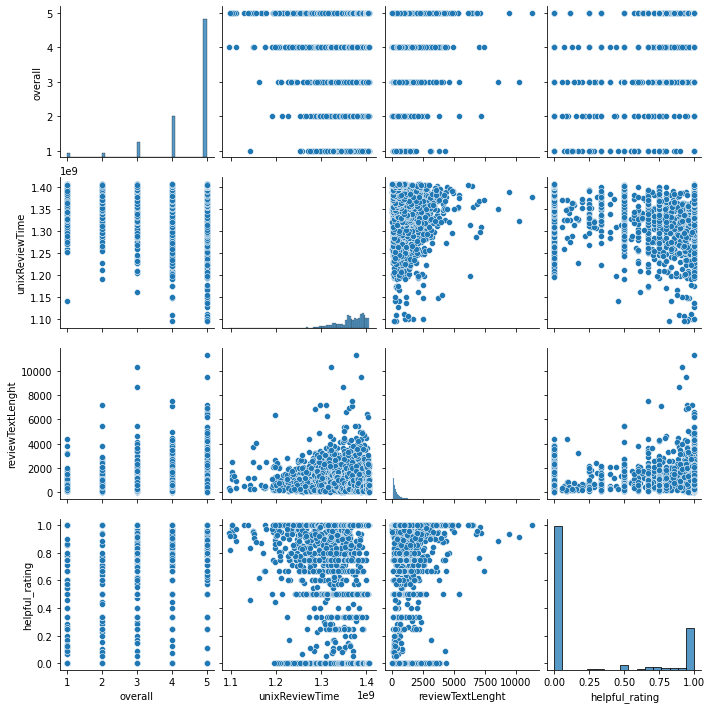

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

### Create auxiliary review text lenght column
df['reviewTextLenght'] = df['reviewText'].apply(len)

### Create auxiliary helpful rating field
def create_helpful_rating(value):
    if(value[1] > 0):
        return value[0]/value[1]
    return 0

df['helpful_rating'] = df['helpful'].apply(create_helpful_rating)

sns.pairplot(df)

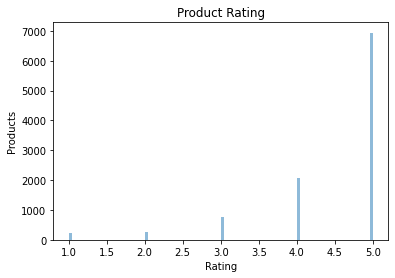

In [46]:
num_bin=100
plt.hist(df['overall'],num_bin,alpha=0.5)
plt.title('Product Rating')
plt.xlabel("Rating")
plt.ylabel("Products")
plt.show()

### 1c. Distribution of the number of reviews per product

In [12]:
# Frequency for products
df.asin.value_counts()

B003VWJ2K8    163
B0002E1G5C    143
B0002F7K7Y    116
B003VWKPHC    114
B0002H0A3S     93
             ... 
B004GYM7IE      5
B000LPUV8K      5
B000LAT0AK      5
B004HJ9COU      5
1384719342      5
Name: asin, Length: 900, dtype: int64

In [28]:
# Total number of products
df.asin.nunique()

900

In [47]:
highestRatedProduct=df.loc[df['asin'] == "B003VWJ2K8"]
highestRatedProduct["overall"].value_counts()

5    134
4     18
3      5
1      5
2      1
Name: overall, dtype: int64

In [48]:
lowestRatedProduct=df.loc[df['asin'] == "B004HJ9COU"]
lowestRatedProduct["overall"].value_counts()

5    3
1    1
3    1
Name: overall, dtype: int64

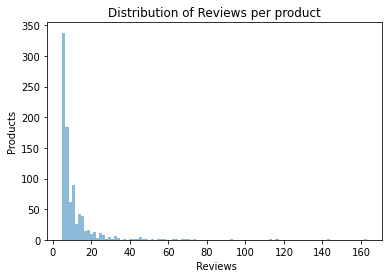

In [49]:
plt.hist(df['asin'].value_counts(),num_bin,alpha=0.5)
plt.xlabel(' Reviews')
plt.ylabel('Products')
plt.title('Distribution of Reviews per product')
plt.show()

### 1d. Distribution of reviews per user

In [51]:
user= df['reviewerID'].value_counts().keys().tolist()
reviewsPerUser = df['reviewerID'].value_counts().tolist()

In [54]:
print(f'Users:\tReviews count')
for i in range(len(user)):
    print(f'{user[i]}:\t{reviewsPerUser[i]}')

Users:	Reviews count
ADH0O8UVJOT10:	42
A15TYOEWBQYF0X:	38
A1L7M2JXN4EZCR:	38
A2EZWZ8MBEDOLN:	36
A2NYK9KWFMJV4Y:	34
A1SD1C8XK3Z3V1:	32
A1MVH1WLYDHZ49:	32
A1GMWTGXW682GB:	29
A34O0KQV4QXWNQ:	28
A1LQC225SE8UNI:	27
AJK15Q9JOEHRH:	25
A22Z554ZQ8NFPC:	25
A1DVUFG2QSJ6IK:	24
A3M1PLEYNDEYO8:	24
A2F92AOWTIUIB:	23
AKYDGCKCY7H9F:	23
A781ITP3HE2N5:	22
A1EVEQAR05SY7L:	21
A3ITN3125FJETP:	21
A3UXW18DP4WSD6:	21
A1YP96MT6W9FTB:	21
A26SN2CVQM4FKM:	21
A6FIAB28IS79:	21
A2F2L5F9OWWVY6:	20
A3OXHLG6DIBRW8:	20
A31B0LYT2C92SN:	20
A2053ZJUGCKUA5:	20
A37A41GWQFMK3D:	20
A319B090A2POEB:	20
A2CJVLER896Q7L:	19
A1CL807EOUPVP1:	19
A1NAA1R38JSNHV:	19
A1YR3RVSBZK8CW:	19
ALHC64J88LVWO:	19
A2RVY2GDMZHH4:	18
A4BTCECGQAIUI:	18
A1EUO0BU72JR7T:	18
ATJQOAUHB5XB8:	17
AKHWZ3S1UVZAO:	17
A3CSSZ6U5J4YS5:	17
A23AKO4BZLZ8DE:	17
A1MAQQXJZTMSKT:	17
A3AOPVQ7EZHTWA:	17
A306YUQBEB2R9T:	16
A2D0F87RY5YMHN:	16
A2Y8JW5NSY95OL:	16
A1RPTVW5VEOSI:	16
A2SBZZ1HSR7WSP:	16
A3HKZSCGFU9T2A:	16
A1C0O09LOLVI39:	15
A3RDS0DJ5EJGA7:	15
A3EXWV8FNSSFL6:	15
AMP0

In [29]:
# Total number of unique users (reviewers)
df.reviewerID.nunique()

1429

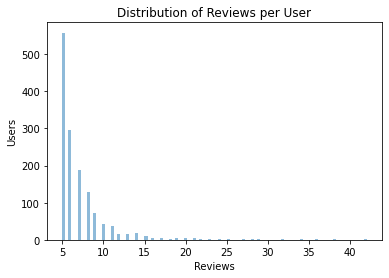

In [50]:
plt.hist(df['reviewerID'].value_counts(),num_bin,alpha=0.5)
plt.xlabel('Reviews')
plt.ylabel('Users')
plt.title('Distribution of Reviews per User')
plt.show()

### 1 extras. Text Lenght Review

In [34]:
# Distribution of the review text lenghts

df['reviewTextLenght'] = df['reviewText'].apply(len)
df.reviewTextLenght.value_counts(bins=20)
#df.reviewTextLenght.value_counts(normalize=True)
#df.reviewTextLenght.value_counts()

(-11.311, 565.5]      7763
(565.5, 1131.0]       1593
(1131.0, 1696.5]       469
(1696.5, 2262.0]       218
(2262.0, 2827.5]       101
(2827.5, 3393.0]        47
(3393.0, 3958.5]        26
(3958.5, 4524.0]        18
(4524.0, 5089.5]         7
(6786.0, 7351.5]         5
(5089.5, 5655.0]         4
(6220.5, 6786.0]         4
(8482.5, 9048.0]         1
(10179.0, 10744.5]       1
(9048.0, 9613.5]         1
(5655.0, 6220.5]         1
(7351.5, 7917.0]         1
(10744.5, 11310.0]       1
(7917.0, 8482.5]         0
(9613.5, 10179.0]        0
Name: reviewTextLenght, dtype: int64

**Although most review comments have a relatively short length, there are a considerable number of lengthy comments (10% > 1000)**

<AxesSubplot:>

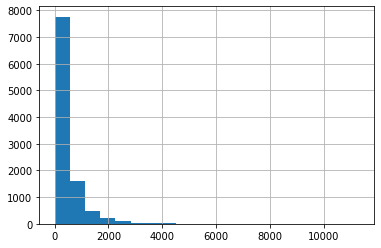

In [35]:
df.reviewTextLenght.hist(bins = 20)

In [18]:
df.reviewTextLenght.describe()

count    10261.000000
mean       485.929052
std        613.436113
min          0.000000
25%        162.000000
50%        284.000000
75%        552.000000
max      11310.000000
Name: reviewTextLenght, dtype: float64

In [19]:
# display large reviews to detect format and determine their usefulness
sample = df.iloc[10]
sample['reviewText']

"Monster makes a wide array of cables, including some that are very high end. I initially purchased a pair ofMonster Rock Instrument Cable - 21 Feet - Angled to Straight 1/4-Inch plugto use with my keyboards, but when it came time to purchase cables for my bass and guitar I thought I'd pinch a few pennies.  I am so glad I did.I compared this cable model to the more expensive models I previously purchased and, aside from looks, could not detect any difference in sound. I Swapped back and forth between my guitars and keyboards, ensuring that each model was used on each instrument - still no difference.What the more expensive model has going for it is looks. I am not sure it (the higher priced model) is even more sturdy because the molded stress relief ends on this model seem to make it more reliable than its pricier sibling.Bottom line: carefully compare both cables using your own instrument and amp - if possible - before making a purchase decision. You may find, as I did, that higher pr

In [20]:
# display large reviews to detect format and determine their usefulness
another_sample = df.iloc[10257]
another_sample['reviewText']

'I\'ve been thinking about trying the Nanoweb strings for a while, but I was a bit put off by the high price (they cost about twice as much as the uncharted strings I\'ve been buying)  and the comments of some reviewers that the tone of coated strings is noticeably duller. I was intrigued by the promise of long life, though; I have a Taylor Big Baby that I bought used, and which came with a set of Nanowebs that had probably been on it for a year- and they didn\'t sound at all like old strings. This review set gave me a chance to finally see for myself how they sound when new.I\'d just changed the strings on my 1970s Gibson Gospel a week ago, so I decided that would be my reference. The Nanowebs went on my 1970s Guild D-35. Both are well broken in, solid spruce top guitars. The Gospel is a bit brighter sounding, but I\'m pretty familiar with the sound of both guitars. If they D-35 sounded dull, I\'d notice.As I was unwrapping the Nanowebs I noticed that while they were labeled "Light" g

In [21]:
# the dataset contains extremely large review texts
df[df['reviewTextLenght']>11000]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewTextLenght,helpful_rating
6576,A20JJ8634DG3FS,B001I8ITQA,"Johnny Guitar ""J.F. Guitar""","[10, 10]","COMPARISONS: I have compared, side by side, th...",5,a GREAT choice for a univibe pedal,1377043200,"08 21, 2013",11310,1.0


In [23]:
# Distribution of most helpful comments
df[df['helpful_rating'] >= 0.70].describe()

,overall,unixReviewTime,reviewTextLenght,helpful_rating
count,2502.000000,2.502000e+03,2502.000000,2502.000000
mean,4.498002,1.338650e+09,796.956435,0.971197
std,0.865504,4.756590e+07,930.985109,0.070004
min,1.000000,1.095466e+09,0.000000,0.700000
25%,4.000000,1.314598e+09,252.000000,1.000000
50%,5.000000,1.348618e+09,487.000000,1.000000
75%,5.000000,1.374710e+09,997.250000,1.000000
max,5.000000,1.405123e+09,11310.000000,1.000000


In [56]:
# Reviews without text
print(df[df['reviewTextLenght'] == 0].describe())
print(df[df['reviewTextLenght'] == 0])

        overall  unixReviewTime  reviewTextLenght  helpful_rating
count  7.000000    7.000000e+00               7.0        7.000000
mean   4.857143    1.341261e+09               0.0        0.981059
std    0.377964    4.424145e+07               0.0        0.020117
min    4.000000    1.258416e+09               0.0        0.952381
25%    5.000000    1.331035e+09               0.0        0.965327
50%    5.000000    1.342656e+09               0.0        0.984375
75%    5.000000    1.368792e+09               0.0        1.000000
max    5.000000    1.388102e+09               0.0        1.000000
          reviewerID        asin            reviewerName     helpful  \
2927   AF7AQHLX1UV1Z  B0002H0H4A           Smoothbassman  [101, 105]   
4401   AU3GYRAKBUAEU  B000CD1R7K              Jon Norris  [189, 192]   
8739  A3N93PUHEMQU34  B004OU2IQG    L. Su "Flying train"      [3, 3]   
9175   AMEZJVXMSEPY0  B005FKF1PY                 M. Luke      [1, 1]   
9306  A3ABAA36CZVYNX  B005M0TKL8              

### 2. Text pre-processing

In [66]:
# Stratified sampling
random_sample = df.groupby('overall', group_keys=False).apply(lambda x: x.sample(200))
random_sample['overall'].value_counts()

1    200
2    200
3    200
4    200
5    200
Name: overall, dtype: int64

In [68]:
# Create labels for "rating of the product"
def product_ratings(x):
    if x['overall'] == 5 or x['overall'] == 4:
        x['ratings'] = 'Positive'
    elif x['overall'] == 3:
        x['ratings'] = 'Neutral'
    elif x['overall'] == 2 or x['overall'] == 1:
        x['ratings'] = 'Negative'
    return x

random_sample = random_sample.apply(product_ratings, axis = 1)
random_sample['ratings'].value_counts()

Negative    400
Positive    400
Neutral     200
Name: ratings, dtype: int64

In [69]:
random_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 6222 to 8996
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reviewerID        1000 non-null   object 
 1   asin              1000 non-null   object 
 2   reviewerName      996 non-null    object 
 3   helpful           1000 non-null   object 
 4   reviewText        1000 non-null   object 
 5   overall           1000 non-null   int64  
 6   summary           1000 non-null   object 
 7   unixReviewTime    1000 non-null   int64  
 8   reviewTime        1000 non-null   object 
 9   reviewTextLenght  1000 non-null   int64  
 10  helpful_rating    1000 non-null   float64
 11  ratings           1000 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 101.6+ KB


In [70]:
# Remove unused columns
random_sample.drop(['reviewerName','helpful','unixReviewTime','reviewTime'], axis=1, inplace= True)
random_sample.columns

Index(['reviewerID', 'asin', 'reviewText', 'overall', 'summary',
       'reviewTextLenght', 'helpful_rating', 'ratings'],
      dtype='object')

### 3. Text Representation

In [ ]:
!python -m spacy download en_core_web_md

In [ ]:
import spacy
import string, re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nlp = spacy.load('en_core_web_md')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

In [ ]:
#Function to create text representation vector for each review
def createReviewVector(reviewText):
    #lowercase
    reviewText = reviewText.lower()
    
    #remove punctuation, digits and whitespace
    reviewText = reviewText.translate(str.maketrans('','', string.punctuation))
    reviewText = re.sub(r'\d+','', reviewText)
    reviewText = reviewText.strip()
    
     #tokenize string and remove stop words
    t_tokenized = word_tokenize(reviewText)
    t_tokenized_nostop = [i for i in t_tokenized if not i in stop_words]
    reviewText = ' '.join(t_tokenized_nostop) 
    
    return nlp(reviewText)

#Create vectors for the sentences in the reviews? >> Effect on large reviews?
df['reviewText'] = df['reviewText'].str.lower()

df['review_vector'] = df['reviewText'].apply(createReviewVector)
df['review_vector'].head(2)

In [73]:
index = 50
df['review_vector'][index].__doc__

for token in df['review_vector'][index]:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop, sep='\t')

print("\n\n")

for entity in df['review_vector'][index].ents:
    print(entity.text, entity.start_char, entity.end_char, entity.label_)

    
print(df['review_vector'][index].vector)

did	do	AUX	VBD	aux	xxx	True	True
nt	not	PART	RB	neg	xx	True	False
expect	expect	VERB	VB	ROOT	xxxx	True	False
cable	cable	NOUN	NN	nsubj	xxxx	True	False
thin	thin	ADV	RB	amod	xxxx	True	False
easily	easily	ADV	RB	advmod	xxxx	True	False
thickness	thickness	NOUN	NN	compound	xxxx	True	False
guitar	guitar	NOUN	NN	compound	xxxx	True	False
cable	cable	NOUN	NN	dobj	xxxx	True	False
i	-PRON-	PRON	PRP	nsubj	x	True	True
ve	have	VERB	VB	aux	xx	True	False
used	use	VERB	VBN	relcl	xxxx	True	True
sure	sure	ADJ	JJ	amod	xxxx	True	False
longterm	longterm	ADJ	JJ	amod	xxxx	True	False
durability	durability	NOUN	NN	compound	xxxx	True	False
signal	signal	PROPN	NNP	compound	xxxx	True	False
lossinterference	lossinterference	PROPN	NNP	compound	xxxx	True	False
foresight	foresight	PROPN	NNP	ROOT	xxxx	True	False
i	-PRON-	PRON	PRP	nmod	x	True	True
d	d	NOUN	NN	nsubj	x	True	False
spend	spend	VERB	VBP	ROOT	xxxx	True	False
couple	couple	NOUN	NN	nummod	xxxx	True	False
extra	extra	ADJ	JJ	amod	xxxx	True	False
bucks	buck	NOUN	